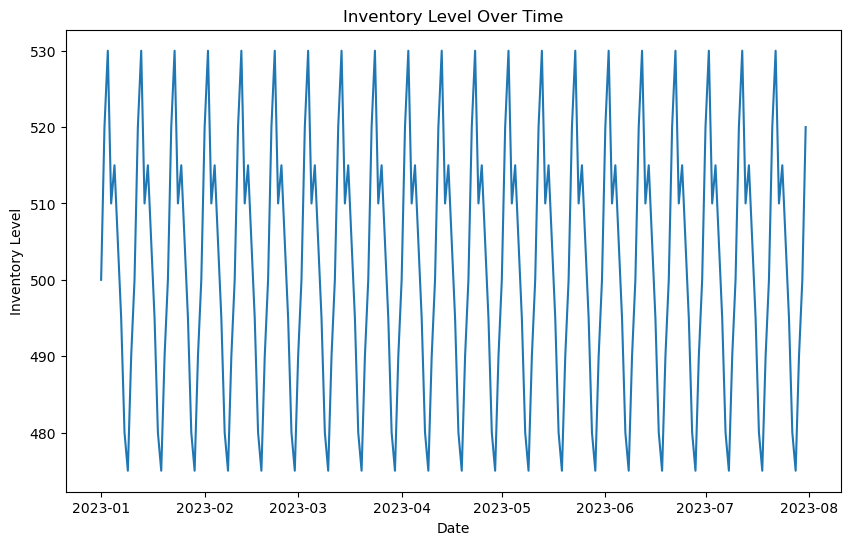

18:09:45 - cmdstanpy - INFO - Chain [1] start processing
18:09:46 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


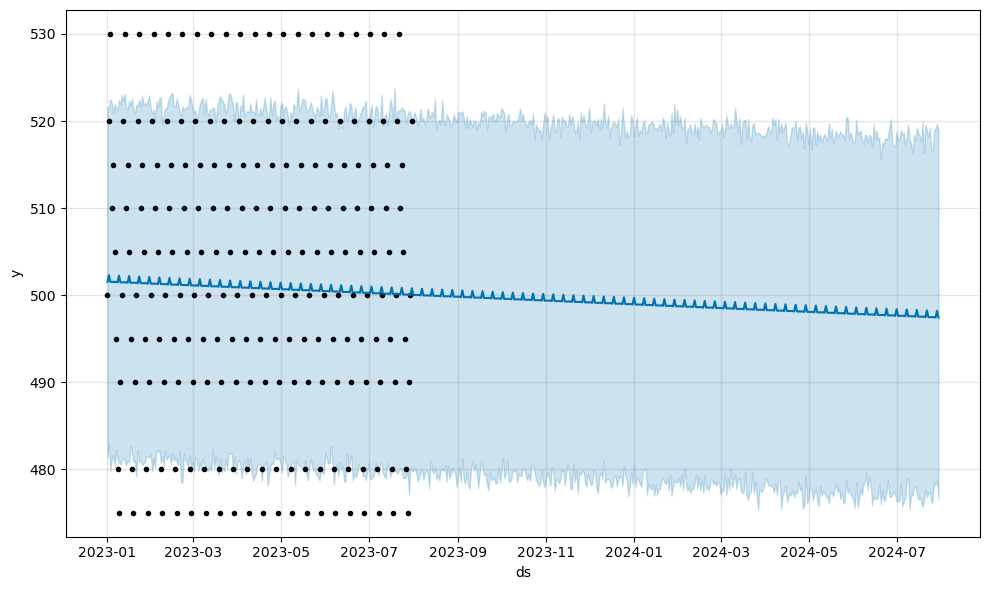

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


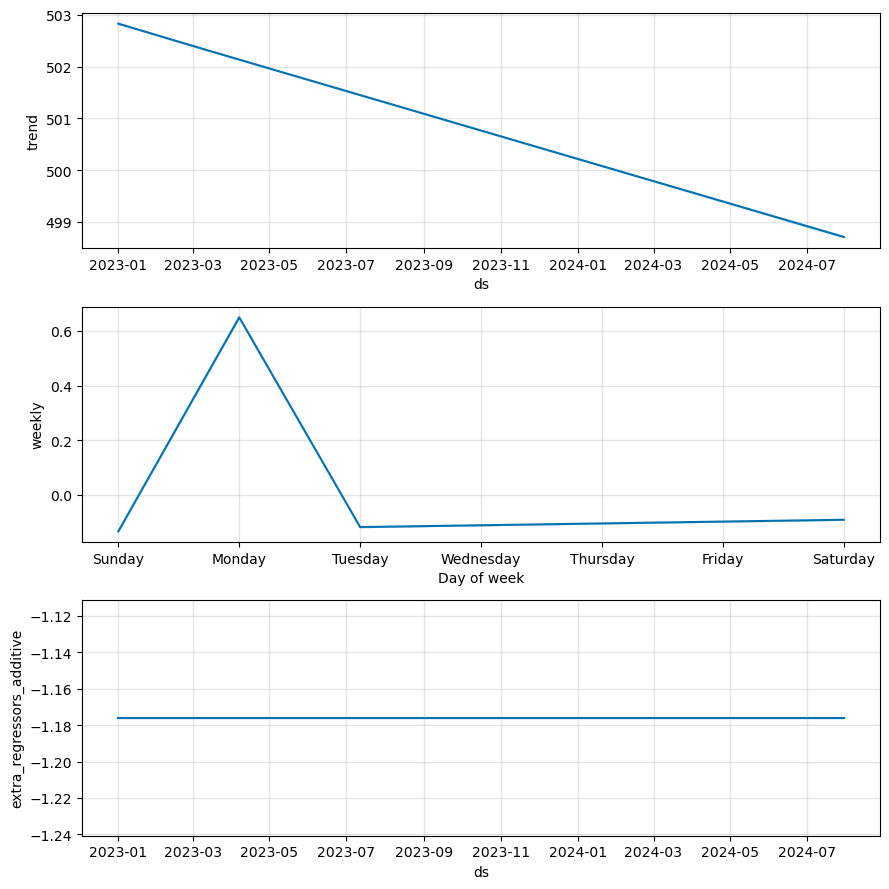

AttributeError: 'Prophet' object has no attribute 'save'

In [16]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('supply_chain_data.csv', delimiter=',', header=None, skiprows=1)

# Manually split columns based on the delimiter
data = data[0].str.split(',', expand=True)

# Rename columns
data.columns = ['date', 'inventory_level', 'lead_time']

# Convert the numeric columns to integers
data['inventory_level'] = pd.to_numeric(data['inventory_level'])
data['lead_time'] = pd.to_numeric(data['lead_time'])

# Step 2: Data Preprocessing
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Rename columns for Prophet
data = data.rename(columns={'date': 'ds', 'inventory_level': 'y'})

# Step 3: Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'])
plt.xlabel('Date')
plt.ylabel('Inventory Level')
plt.title('Inventory Level Over Time')
plt.show()

# Step 4: Model Selection - Using Prophet
model = Prophet()
model.add_regressor('lead_time')  # Adding lead time as an external regressor
model.fit(data)

# Step 5: Model Training and Validation
# Make future dataframe for predictions
future = model.make_future_dataframe(periods=365)

# Add the lead time values for the future periods (use historical average or any method to predict future lead times)
future['lead_time'] = 7  # Example: using a constant value for simplicity

forecast = model.predict(future)

# Step 6: Model Evaluation
# Plot forecast
fig = model.plot(forecast)
plt.show()

# Plot forecast components
fig2 = model.plot_components(forecast)
plt.show()

# Step 7: Model Deployment
# Save the model
model.save('prophet_model.json')
